In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
!ln -s /content/drive/My\ Drive/ /mydrive
#!ls /mydrive

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import keras

from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,  featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        r'/mydrive/chest_xray/train',
        target_size=(100,100),
        color_mode='rgb',
        batch_size=32,
        class_mode='categorical',
        )
valid_datagen = ImageDataGenerator(rescale=1./255,  featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
valid_generator = valid_datagen.flow_from_directory(
        r'/content/drive/MyDrive/chest_xray/val',
        target_size=(100,100),
        color_mode='rgb',
        batch_size=32,
        class_mode='categorical',
        )


train_generator.class_indices
train_generator.classes
train_generator.class_indices.keys()

Found 4337 images belonging to 2 classes.
Found 904 images belonging to 2 classes.


dict_keys(['NORMAL', 'PNEUMONIA'])

In [ ]:
from keras.layers import concatenate
from tensorflow import keras  

In [ ]:
from keras.layers import LSTM
from keras.layers import Dense, Dropout, Activation

In [ ]:


base_model = tf.keras.applications.Xception(include_top = False, # Leave out the last fully connected layer
weights = 'imagenet',
input_shape = (100, 100, 3), # Shape of our images
pooling='max')



for layer in base_model.layers:
    layer.trainable = False


# Flatten the output layer to 1 dimension
x = Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
#x = layers.Dropout(0.5)(x)

# Add a final softmax layer for classification
x = Dense(5, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)
model.summary()

83697664/83683744 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 49, 49, 32)   864         ['input_1[0][0]']                
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 49, 49, 32)  128         ['block1_conv1[0][0]']           
 ation)                                                                                           
                             

In [ ]:


base_model = tf.keras.applications.VGG16(include_top = False, # Leave out the last fully connected layer
weights = 'imagenet',
input_shape = (100, 100, 3), # Shape of our images
pooling='max')



for layer in base_model.layers:
    layer.trainable = False


# Flatten the output layer to 1 dimension
x = Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
#x = layers.Dropout(0.5)(x)

# Add a final softmax layer for classification
x = Dense(5, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)
model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                            

In [ ]:
def models(input_size = (100,100,3)):

    inputs = tf.keras.layers.Input(input_size)
    
    base_model1 =     tf.keras.applications.Xception(
        include_top = False,
        weights     = 'imagenet',
        pooling     = 'max'
        
        )(inputs)

    base_model2 =     tf.keras.applications.VGG16(
        include_top = False,
        weights     = 'imagenet',
        pooling     = 'max'
        )(inputs)
    


    #base_model1=tf.keras.layers.AveragePooling2D(pool_size=(2, 2))(base_model1)
    
    base_model1=Flatten()(base_model1)

    base_model1=Dense(256,activation='relu')(base_model1)
    base_model1=(Dropout(0.2))(base_model1)
    base_model1=(Dense(128,activation='relu'))(base_model1)
    base_model1=(Dropout(0.3))(base_model1)
    base_model1=(Dense(64,activation='relu'))(base_model1)

    base_model2=Flatten()(base_model2)

    base_model2=Dense(256,activation='relu')(base_model2)
    base_model2=(Dropout(0.2))(base_model2)
    base_model2=(Dense(128,activation='relu'))(base_model2)
    base_model2=(Dropout(0.3))(base_model2)
    base_model2=(Dense(64,activation='relu'))(base_model2)

    model = tf.keras.layers.Concatenate()([base_model1,base_model2])

    model=(Dense(128, activation='relu'))(model)
    model=(Dense(64, activation='relu'))(model)
    # final sigmoid layer for classification
    model = Dense(2, activation='sigmoid')(model)
    M = tf.keras.Model(inputs=inputs, outputs=model)
    M.compile(
        optimizer = 'adam', 
        loss = 'binary_crossentropy',               
        metrics=['accuracy']
    )
  
    return M

model = models()

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 xception (Functional)          (None, 2048)         20861480    ['input_1[0][0]']                
                                                                                                  
 vgg16 (Functional)             (None, 512)          14714688    ['input_1[0][0]']                
                                                                                                  
 flatten (Flatten)              (None, 2048)         0           ['xception[0][0]']           

In [ ]:
#Change the link to checkpoint folder
from keras.callbacks import CSVLogger
checkpoint_path = "/content/drive/MyDrive/Chest_xray/cp-{epoch:04d}.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1,
    save_weights_only=True,
    save_freq=1500)
    

csv_logger = CSVLogger("/content/drive/MyDrive/Chest_xray/model_history_log.csv", append=True)

In [ ]:
#Change the link to checkpoint folder
#latest = tf.train.latest_checkpoint('/content/drive/MyDrive/chest_xray/ResNet101')
#Run in case of interuption 
#model.load_weights(latest)
#latest

In [ ]:
history=model.fit(train_generator,
                    epochs=100,
                    validation_data=valid_generator,
                    callbacks=[cp_callback,csv_logger]
                    )

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
164/164 [==============================] - 1052s 6s/step - loss: 0.2977 - accuracy: 0.9048 - val_loss: 1.9004 - val_accuracy: 0.6875
Epoch 2/100
164/164 [==============================] - 77s 469ms/step - loss: 0.1189 - accuracy: 0.9600 - val_loss: 0.8287 - val_accuracy: 0.8125
Epoch 3/100
164/164 [==============================] - 77s 467ms/step - loss: 0.1039 - accuracy: 0.9651 - val_loss: 0.3053 - val_accuracy: 0.7500
Epoch 4/100
164/164 [==============================] - 77s 467ms/step - loss: 0.0996 - accuracy: 0.9665 - val_loss: 0.5760 - val_accuracy: 0.8125
Epoch 5/100
164/164 [==============================] - 78s 475ms/step - loss: 0.0825 - accuracy: 0.9728 - val_loss: 1.5111 - val_accuracy: 0.6250
Epoch 6/100
164/164 [==============================] - 77s 468ms/step - loss: 0.0984 - accuracy: 0.9659 - val_loss: 1.3216 - val_accuracy: 0.6250
Epoch 7/100
164/164 [==============================] - 77s 469ms/step - loss: 0.0799 - accuracy: 0.9722 - val_loss: 1.9069 - 

In [ ]:
model.save('/content/drive/MyDrive/Chest_xray/Latest.model')


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        r'/content/drive/MyDrive/chest_xray/test',
        target_size=(100,100),
        color_mode='rgb',
        batch_size=64,
        class_mode='categorical',
        shuffle=False
        )

test_imgs, test_labels = next(test_generator)

Found 624 images belonging to 2 classes.


In [ ]:
#model1 = tf.keras.models.load_model('/content/drive/MyDrive/PP_Chest_xray/Final.model')
predictions = model.predict(x=test_generator, verbose=0)
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
import sklearn
from sklearn.metrics import accuracy_score    
from sklearn.metrics import confusion_matrix

y_true=test_generator.classes
y_pred=np.argmax(predictions, axis=-1)

cm = confusion_matrix(y_true, y_pred)

print('Prediction Accuracy:', "{:.2f}".format(100*accuracy_score(y_true, y_pred))+"%")

Prediction Accuracy: 91.67%


Confusion matrix, without normalization
[[194  40]
 [ 12 378]]


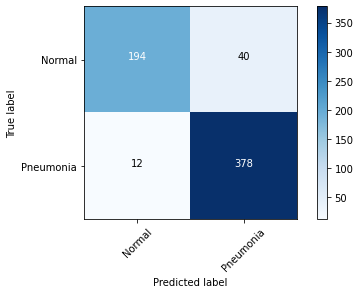

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm_plot_labels = ['Normal', 'Pneumonia']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)
abc='CM'
plt.savefig(f'/mydrive/{abc}.png',bbox_inches="tight",dpi=520)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       234
           1       0.90      0.97      0.94       390

    accuracy                           0.92       624
   macro avg       0.92      0.90      0.91       624
weighted avg       0.92      0.92      0.92       624



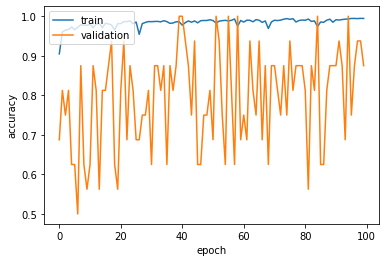

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'],loc='upper left')
plt.show()

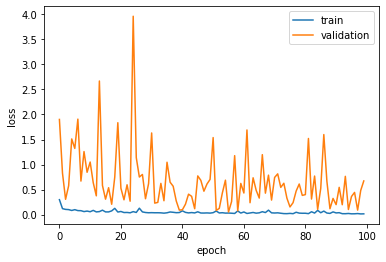

In [ ]:
abc='Loss vs Epoch Graph_350'
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'],loc='upper right')
plt.savefig(f'/mydrive{abc}.png',bbox_inches="tight",dpi=520)
plt.show()

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


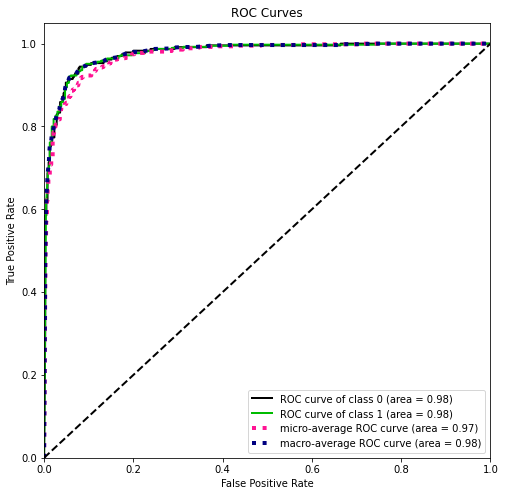

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_roc(
    y_true,
    predictions,
    figsize=(8,8))
abc='ROC Curve Normal_250'
#plt.savefig("/content/drive/MyDrive/Test/"+data[i],bbox_inches='tight', pad_inches=0)

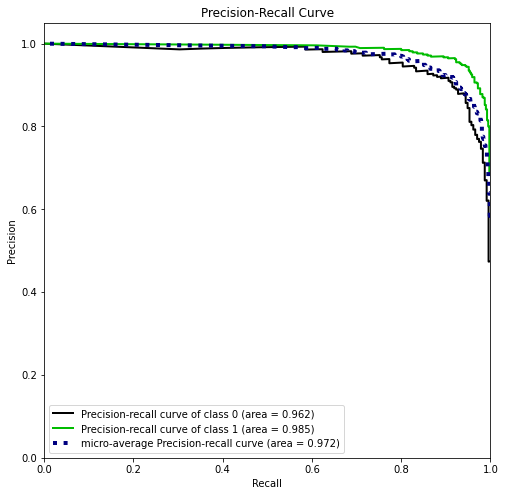

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_precision_recall(
    y_true,
    predictions,
    figsize=(8,8))
abc='AOC Curve Normal_250'
#plt.savefig("/content/drive/MyDrive/Test/"+data[i],bbox_inches='tight', pad_inches=0)